In [1]:
import glob
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import folium
plt.style.use('ggplot')

In [2]:
from data_processing import *

## Data Processing

In [3]:
bike_df = read_data()

/Users/christopherolley/USF/Courses/Module-4/data-visualization/final-project/data_processing.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(trip_data, axis=0)


Converting start and end times to to datetime fields and adding in extra time features

In [10]:
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])
bike_df['hour'] = bike_df.start_time.dt.hour
bike_df['minute'] = bike_df.start_time.dt.minute
bike_df['day'] = bike_df.start_time.dt.dayofweek

In [11]:
idx = (bike_df.start_station_longitude > -122.528114) & (bike_df.start_station_longitude < -122.343407) & \
      (bike_df.start_station_latitude > 37.705825) & (bike_df.start_station_latitude < 37.815209)
bike_df_sf = bike_df[idx]

Basic EDA type plots:

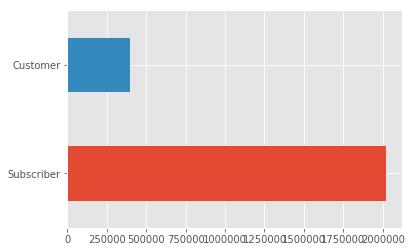

In [12]:
# user_types
bike_df_sf.user_type.value_counts().plot(kind='barh')
plt.show()

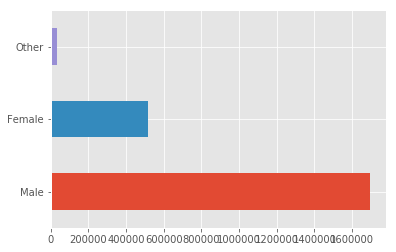

In [13]:
# gender of members
bike_df_sf.member_gender.value_counts().plot(kind='barh')
plt.show()

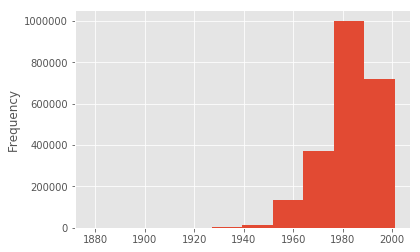

In [14]:
# birth year distribution
bike_df_sf.member_birth_year.plot(kind='hist')
plt.show()

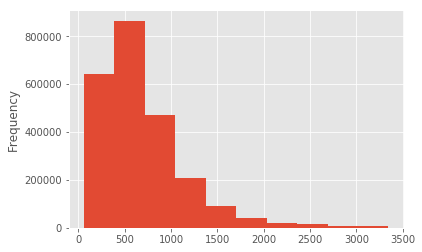

In [15]:
# ride duration distribution
idx = bike_df_sf.duration_sec < bike_df_sf.duration_sec.quantile(0.98)
bike_df_sf[idx].duration_sec.plot(kind='hist')
plt.show()

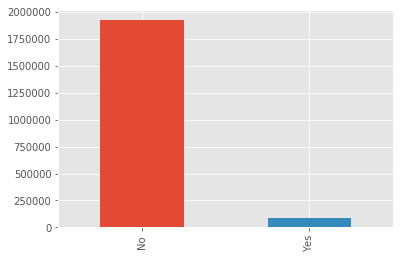

In [16]:
# bike share for all trip
bike_df_sf.bike_share_for_all_trip.value_counts().plot(kind='bar')
plt.show()

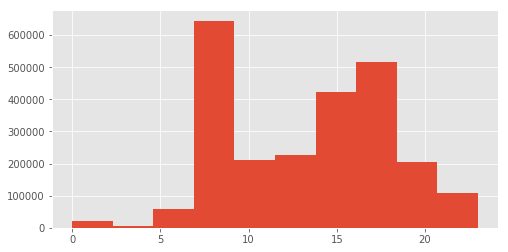

In [17]:
# trip times distribution
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(bike_df_sf.start_time.dt.hour)
plt.show()

Number of trips by location:

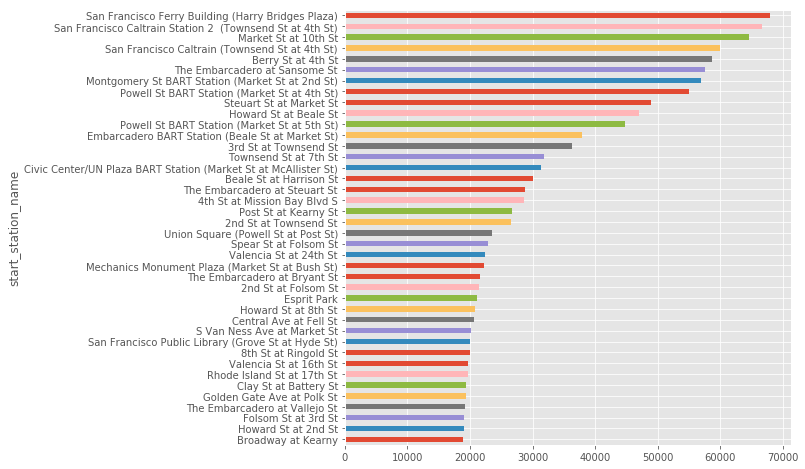

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
bike_df_sf.groupby('start_station_name').count().iloc[:,0].sort_values(ascending=True).iloc[-40:].plot(kind='barh', ax=ax)
plt.show()

Distribution of number of trips over the day where each point is a count for a station at that hour

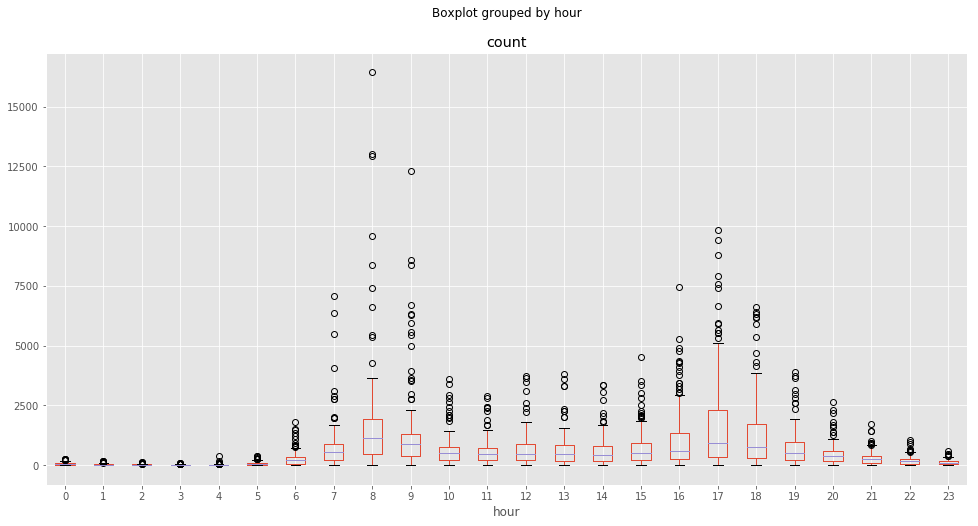

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
count_by_hour_day = bike_df_sf.groupby(['hour', 'start_station_name']).count().iloc[:,[0]].reset_index()
count_by_hour_day.columns = ['hour', 'start_station_name', 'count']
count_by_hour_day.boxplot(column='count', by='hour', ax=ax)
plt.show()

Distribution of number of trips in each hour where each point is a count for a specific day of the week at that hour

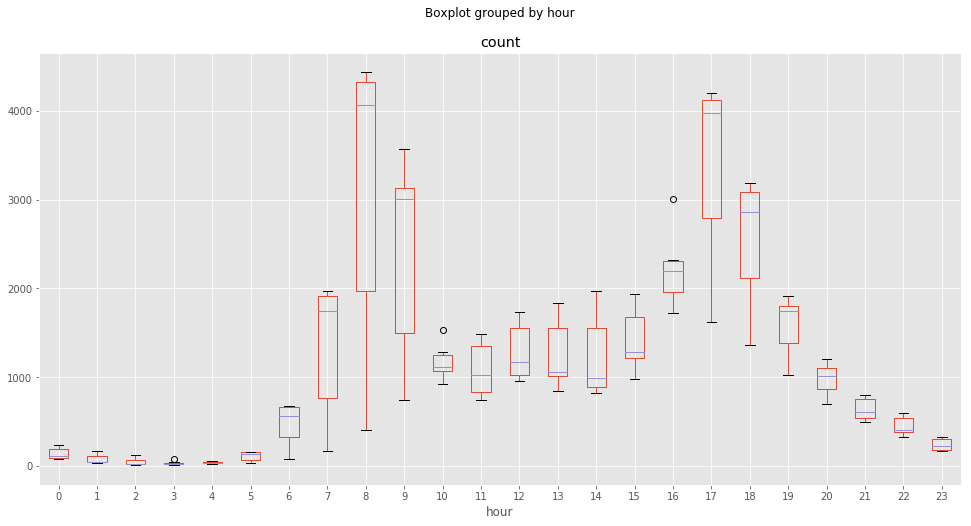

In [94]:
fig, ax = plt.subplots(figsize=(16,8))
count_by_hour_day = bike_df_sf.groupby(['hour', 'day']).count().iloc[:,[0]].reset_index()
count_by_hour_day.columns = ['hour', 'day', 'count']
count_by_hour_day.boxplot(column='count', by='hour', ax=ax)
plt.show()

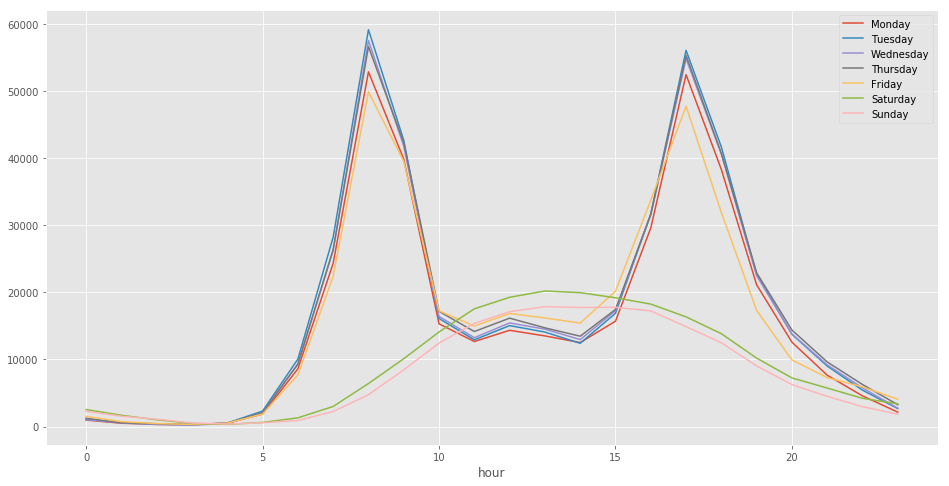

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
labels = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
for label, df in bike_df_sf.groupby('day'):
    df.groupby('hour').size().plot(ax=ax, label=labels[label])
plt.legend()
plt.show()

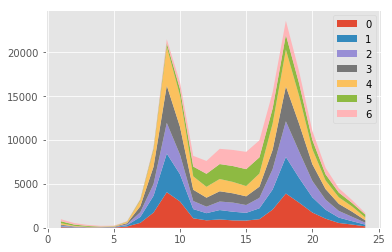

In [138]:
y, label_values = [], []
for label, df in bike_df_sf.groupby('day'):
    y.append(list(df.groupby('hour').size().values))
    label_values.append(labels[label])
plt.stackplot(range(1, 25), y, labels=labels)
plt.legend()
plt.show()

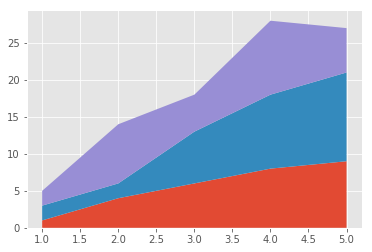

In [127]:
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# Plot
plt.stackplot(x,y, labels=['A','B','C'])

In [22]:
small_df = pd.read_csv('data/fordgobike-tripdata-small.csv')

In [26]:
small_df.day == 1

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
175832     True
175833     True
175834     True
175835     True
175836     True
175837     True
175838     True
175839     True
175840     True
175841     True
175842     True
175843     True
175844     True
175845     True
175846     True
175847     True
175848     True
175849     True
175850     True
175851     True
175852     True
175853     True
175854     True
175855     True
175856     True
175857     True
175858     True
175859     True
175860     True
175861     True
Name: day, Length: 17586